## News Sentiment Analysis and Crypto price prediction

In [1]:
## Book 3 : Bitcoin Sentiment Analysis & Merging Sentiment Data with Closing Prices

In [2]:
# Initial imports
import nltk
import numpy as np
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime, date
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riteshchugani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load the News Articles from the CSV File as a DataFrame

In [4]:
# Load news from CSV file
file_path = Path("bitcoin_news_en_.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,title,description,text,date,language
0,Netflix is already making a docuseries about t...,Netflix\r\n is making a docuseries about one o...,Netflix\r\n is making a docuseries about one o...,2022-02-11,en
1,Justice Dept. Announces Raft of Changes Meant ...,The moves came a week after the department mad...,"Even in cyberspace, the Department of Justice ...",2022-02-17,en
2,Inside Heather Morgan and Ilya Lichtenstein's ...,The arrests of Ilya Lichtenstein and Heather M...,The couple would never flee from the country a...,2022-02-13,en
3,"Super Bowl Crypto Ads Feature Larry David, LeB...","If Sunday’s Super Bowl ads are any indication,...","If Sundays Super Bowl ads are any indication, ...",2022-02-14,en
4,It Only Took 3 Days for Netflix to Order a Doc...,The news of one of the biggest money launderin...,The news of one of the biggest money launderin...,2022-02-12,en


In [5]:
#Viewing the count of various elements in the data frame
news_df.count()

title          100
description    100
text           100
date           100
language       100
dtype: int64

In [6]:
#show how many articles were written about Bitcoin on a particular day.
daily_data = pd.DataFrame(news_df.groupby('date').count())
daily_data

,title,description,text,language
date,,,,
2022-02-10,4,4,4,4
2022-02-11,6,6,6,6
2022-02-12,3,3,3,3
2022-02-13,4,4,4,4
2022-02-14,7,7,7,7
2022-02-15,7,7,7,7
2022-02-16,1,1,1,1
2022-02-17,5,5,5,5
2022-02-18,5,5,5,5


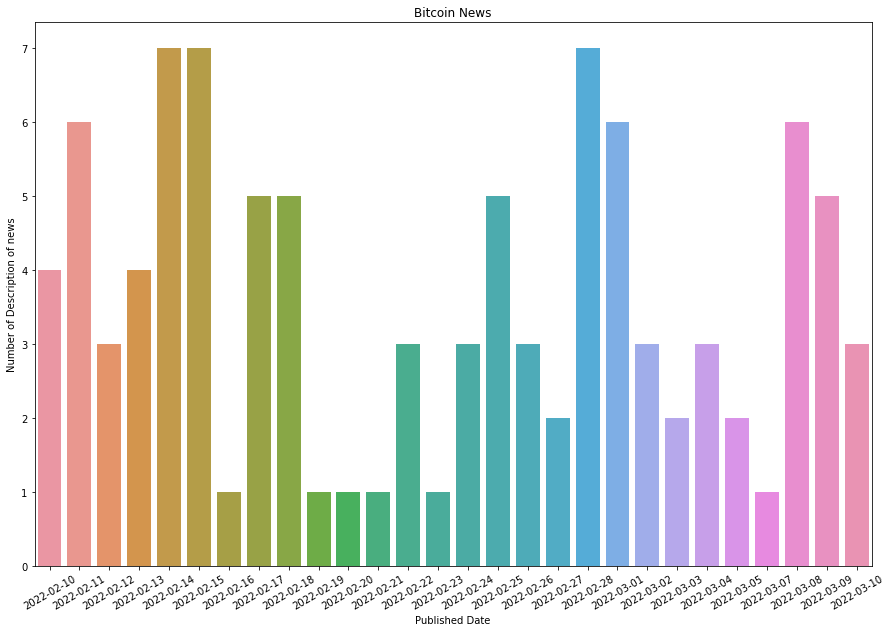

In [7]:
#Plot the number of articles on each day
plt.figure(figsize =(15,10))
ax = sns.barplot( x = daily_data.index , y = daily_data['title'])
ax.set(xlabel = 'Published Date', ylabel = 'Number of Description of news', title = 'Bitcoin News')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.savefig('../Group4/Images/bitcoin_articles.png')
plt.show()

## Calculating VADER Sentiment Score for News Titles and Text

In [8]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [9]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_df = news_df.join(title_sentiment_df).join(text_sentiment_df)

news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Netflix is already making a docuseries about t...,Netflix\r\n is making a docuseries about one o...,Netflix\r\n is making a docuseries about one o...,2022-02-11,en,0.0000,0.000,1.000,0.0,0,-0.7096,0.000,0.831,0.169,-1
1,Justice Dept. Announces Raft of Changes Meant ...,The moves came a week after the department mad...,"Even in cyberspace, the Department of Justice ...",2022-02-17,en,0.5267,0.274,0.726,0.0,1,0.7351,0.147,0.853,0.000,1
2,Inside Heather Morgan and Ilya Lichtenstein's ...,The arrests of Ilya Lichtenstein and Heather M...,The couple would never flee from the country a...,2022-02-13,en,0.0000,0.000,1.000,0.0,0,-0.3400,0.057,0.825,0.118,-1
3,"Super Bowl Crypto Ads Feature Larry David, LeB...","If Sunday’s Super Bowl ads are any indication,...","If Sundays Super Bowl ads are any indication, ...",2022-02-14,en,0.8020,0.356,0.644,0.0,1,0.7783,0.163,0.837,0.000,1
4,It Only Took 3 Days for Netflix to Order a Doc...,The news of one of the biggest money launderin...,The news of one of the biggest money launderin...,2022-02-12,en,0.0000,0.000,1.000,0.0,0,0.5859,0.124,0.876,0.000,1


## Analyzing Sentiments Results

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

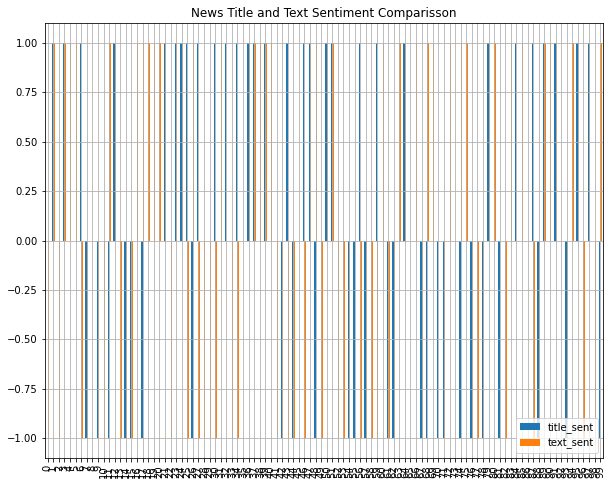

In [10]:
# Plot bar chart
news_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [11]:
#Grouping the data by date and finding the avg title sentiment compound score on that day
title_sentiment_avg = news_df.groupby('date')[['title_compound']].mean()

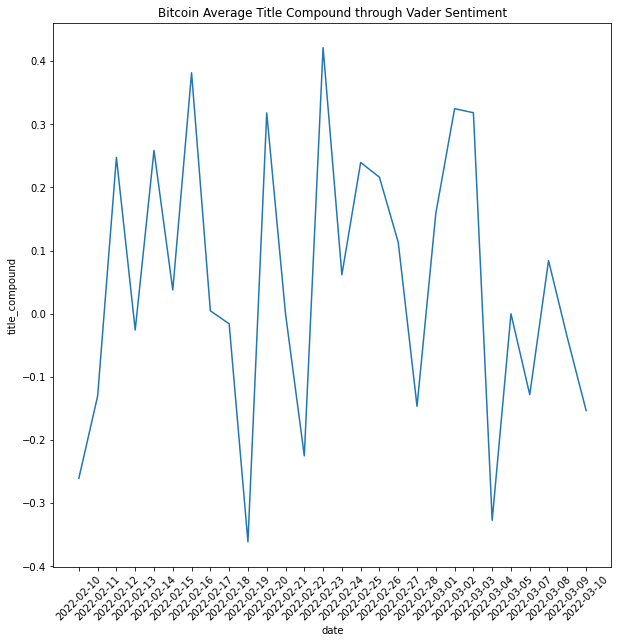

In [12]:
#Plot the title compound scores according to the dates
plt.figure(figsize =(10,10))
plt.xticks(rotation=45)
sns.lineplot(x = title_sentiment_avg.index, y = title_sentiment_avg['title_compound']).set_title('Bitcoin Average Title Compound through Vader Sentiment')
plt.savefig('../Group4/Images/bitcoin_vader.png')
plt.show()

In [13]:
# Describe dataframe
news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.034665,0.088920,0.83949,0.071580,0.040000,0.021806,0.069990,0.869460,0.060570,0.020000
std,0.359265,0.138495,0.16926,0.120728,0.751026,0.474368,0.067578,0.087923,0.073272,0.942595
min,-0.750600,0.000000,0.41700,0.000000,-1.000000,-0.895700,0.000000,0.627000,0.000000,-1.000000
25%,-0.109025,0.000000,0.72300,0.000000,-1.000000,-0.323650,0.000000,0.821250,0.000000,-1.000000
50%,0.000000,0.000000,0.84450,0.000000,0.000000,0.000000,0.058000,0.874500,0.041000,0.000000
75%,0.249425,0.172500,1.00000,0.167000,1.000000,0.428550,0.108500,0.938250,0.096000,1.000000
max,0.802000,0.559000,1.00000,0.444000,1.000000,0.907900,0.292000,1.000000,0.269000,1.000000


## Bitcoin Crypto price

In [14]:
#Getting Crypto price of Bitcoin from Yahoo Finance
bit_df = yf.download('BTC-USD', 
                      start='2022-02-10', 
                      end='2022-03-10', 
                      progress=False,
)
bit_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-10,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2022-02-11,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781
2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012


<AxesSubplot:xlabel='Date'>

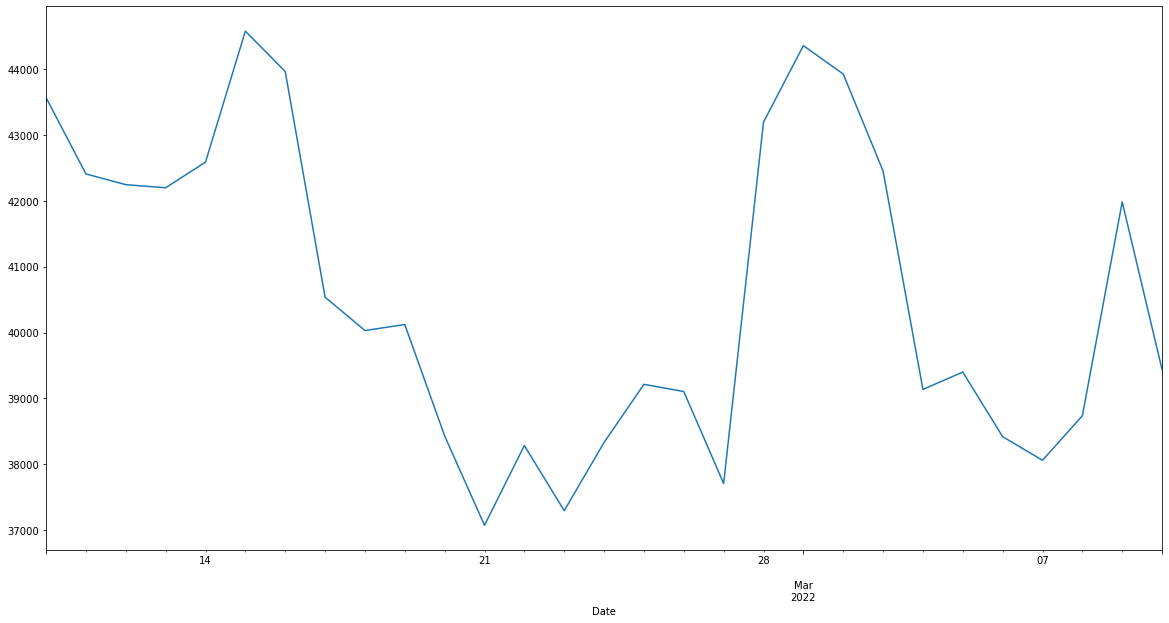

In [15]:
#Plotting the closing prices
bit_df['Close'].plot(label = 'Closing Price', figsize = (20,10))

## Merging Bitcoin Price with Sentiment Data

In [16]:
#Extracting the sentiment result from the News DF
news_df_edit = news_df.drop(columns=["title", "description", "text", "language"])
news_df_edit.head()

,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-02-11,0.0000,0.000,1.000,0.0,0,-0.7096,0.000,0.831,0.169,-1
1,2022-02-17,0.5267,0.274,0.726,0.0,1,0.7351,0.147,0.853,0.000,1
2,2022-02-13,0.0000,0.000,1.000,0.0,0,-0.3400,0.057,0.825,0.118,-1
3,2022-02-14,0.8020,0.356,0.644,0.0,1,0.7783,0.163,0.837,0.000,1
4,2022-02-12,0.0000,0.000,1.000,0.0,0,0.5859,0.124,0.876,0.000,1


In [17]:
#Parsing date to date time format
news_df_edit["date"] = pd.to_datetime(news_df_edit["date"])
print(news_df_edit.dtypes)

date              datetime64[ns]
title_compound           float64
title_pos                float64
title_neu                float64
title_neg                float64
title_sent                 int64
text_compound            float64
text_pos                 float64
text_neu                 float64
text_neg                 float64
text_sent                  int64
dtype: object


In [18]:
#Sorting Values by Date
news_df_edit.sort_values(by='date', inplace=True)
print(news_df_edit)

         date  title_compound  title_pos  title_neu  title_neg  title_sent  \
65 2022-02-10          0.0000      0.000      1.000      0.000           0   
70 2022-02-10         -0.4939      0.000      0.802      0.198          -1   
6  2022-02-10          0.2023      0.205      0.795      0.000           1   
88 2022-02-10         -0.7506      0.000      0.556      0.444          -1   
0  2022-02-11          0.0000      0.000      1.000      0.000           0   
..        ...             ...        ...        ...        ...         ...   
42 2022-03-09         -0.4215      0.000      0.781      0.219          -1   
69 2022-03-09          0.0000      0.000      1.000      0.000           0   
24 2022-03-10          0.1531      0.151      0.849      0.000           1   
93 2022-03-10         -0.6124      0.000      0.643      0.357          -1   
33 2022-03-10          0.0000      0.000      1.000      0.000           0   

    text_compound  text_pos  text_neu  text_neg  text_sent  
65

In [19]:
#Grouping all the title sentiment of the same date into the min value of that date - Conservative Approach to ensure we are not overestimating
news_df_title = news_df_edit.groupby('date', as_index=False, sort=False)['title_sent'].min()
news_df_title

,date,title_sent
0,2022-02-10,-1
1,2022-02-11,-1
2,2022-02-12,0
3,2022-02-13,-1
4,2022-02-14,-1
5,2022-02-15,-1
6,2022-02-16,1
7,2022-02-17,-1
8,2022-02-18,-1
9,2022-02-19,-1


In [20]:
#Grouping all the text sentiment of the same date into the min value of that date - Conservative Approach to ensure we are not overestimating
news_df_text = news_df_edit.groupby('date', as_index=False, sort=False)['text_sent'].min()
news_df_text

,date,text_sent
0,2022-02-10,-1
1,2022-02-11,-1
2,2022-02-12,-1
3,2022-02-13,-1
4,2022-02-14,-1
5,2022-02-15,-1
6,2022-02-16,-1
7,2022-02-17,-1
8,2022-02-18,-1
9,2022-02-19,1


In [21]:
#Renaming the column to Date which is same as crypto column and indexing the DF by date
news_df_title = news_df_title.rename(columns={'date': 'Date'})
news_df_title.set_index('Date', inplace=True)
news_df_title.head()

,title_sent
Date,
2022-02-10,-1
2022-02-11,-1
2022-02-12,0
2022-02-13,-1
2022-02-14,-1


In [22]:
#Renaming the column to Date which is same as crypto column and indexing the DF by date
news_df_text = news_df_text.rename(columns={'date': 'Date'})
news_df_text.set_index('Date', inplace=True)
news_df_text.head()

,text_sent
Date,
2022-02-10,-1
2022-02-11,-1
2022-02-12,-1
2022-02-13,-1
2022-02-14,-1


In [23]:
#Concat the crypto price with sentiment data
sentiment_closing_df = pd.concat([news_df_title,news_df_text,bit_df], axis=1)
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,-1.0,-1.0,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2022-02-11,-1.0,-1.0,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781
2022-02-12,0.0,-1.0,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2022-02-13,-1.0,-1.0,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,-1.0,-1.0,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012


In [24]:
#Filling in empty values of title_sent with their most recent value positions - This is done when news is missing for any particular date
sentiment_closing_df['title_sent'] = sentiment_closing_df['title_sent'].fillna(method='ffill')
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,-1.0,-1.0,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2022-02-11,-1.0,-1.0,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781
2022-02-12,0.0,-1.0,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2022-02-13,-1.0,-1.0,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,-1.0,-1.0,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012


In [25]:
#Filling in empty values of text_sent with their most recent value positions - This is done when news is missing for any particular date
sentiment_closing_df['text_sent'] = sentiment_closing_df['text_sent'].fillna(method='ffill')
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,-1.0,-1.0,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2022-02-11,-1.0,-1.0,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781
2022-02-12,0.0,-1.0,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2022-02-13,-1.0,-1.0,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,-1.0,-1.0,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012


In [26]:
#Save tha final DataFrame as a CSV file for further analysis in the forthcoming activities.
file_path = Path("sentiment_closing_bit.csv")
sentiment_closing_df.to_csv(file_path, index=True, encoding='utf-8-sig')

In [27]:
# Sorting title_sent into Positive, Negative and Neutral sentiment

sentiment = [] 
for score in sentiment_closing_df['title_sent']:
    if score >= 1 :
          sentiment.append("Positive") 
    elif score <= - 1 : 
          sentiment.append("Negative")        
    else : 
        sentiment.append("Neutral")   

sentiment_closing_df["Title_Sentiment"] = sentiment
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume,Title_Sentiment
Date,,,,,,,,,
2022-02-10,-1.0,-1.0,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537,Negative
2022-02-11,-1.0,-1.0,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781,Negative
2022-02-12,0.0,-1.0,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304,Neutral
2022-02-13,-1.0,-1.0,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015,Negative
2022-02-14,-1.0,-1.0,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,Negative


In [28]:
# Sentiment Count
sentiment_closing_df['Title_Sentiment'].value_counts()

Negative    16
Neutral     10
Positive     3
Name: Title_Sentiment, dtype: int64

<AxesSubplot:title={'center':'Bitcoin Title Sentiment Classification'}>

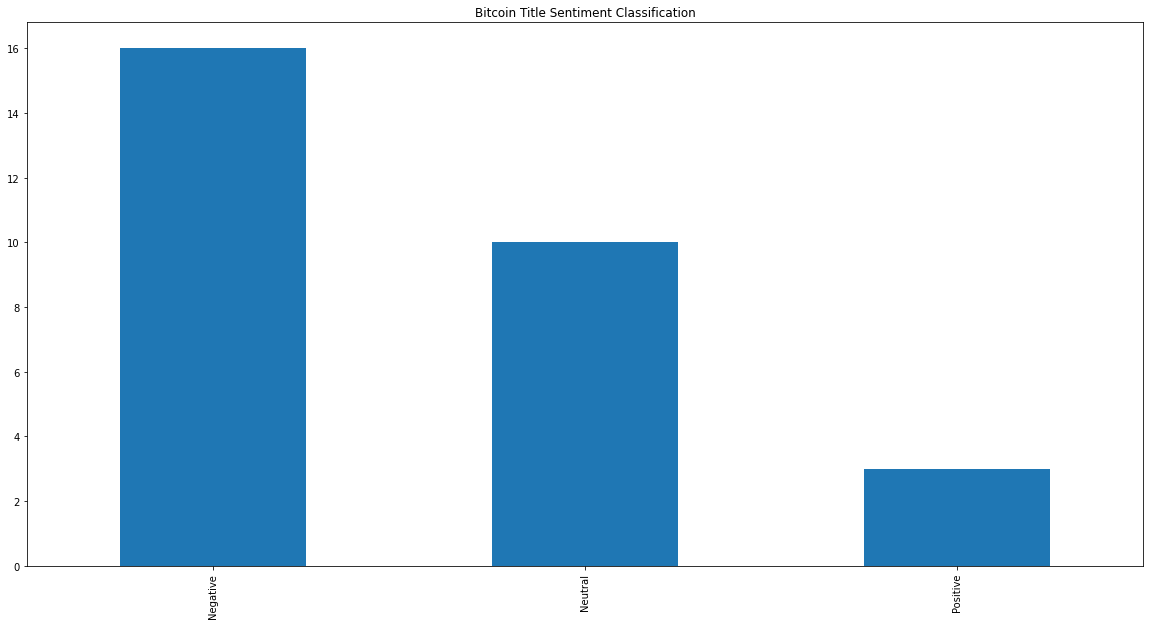

In [29]:
# Sentiment Plot
sentiment_closing_df['Title_Sentiment'].value_counts().plot.bar(title = 'Bitcoin Title Sentiment Classification', figsize = (20,10))

In [30]:
#Crypto Price trend basis the difference between current price to previous day price and coverting them to '0'
sentiment_closing_df['Price Diff'] = sentiment_closing_df['Close'].diff()
sentiment_closing_df.dropna(inplace = True)
sentiment_closing_df['Trend'] = np.where(
    sentiment_closing_df['Price Diff'] > 0 , 1, 0)

sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume,Title_Sentiment,Price Diff,Trend
Date,,,,,,,,,,,
2022-02-11,-1.0,-1.0,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781,Negative,-1157.175781,0
2022-02-12,0.0,-1.0,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304,Neutral,-163.468750,0
2022-02-13,-1.0,-1.0,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015,Negative,-46.953125,0
2022-02-14,-1.0,-1.0,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,Negative,389.402344,1
2022-02-15,-1.0,-1.0,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,Negative,1988.285156,1


In [31]:
## Calculating the days of price trend where price did not increase
sentiment_closing_df.loc[sentiment_closing_df.Trend == 0,"Trend"].count()

17

In [32]:
## Calculating the days of price trend where price did increase
sentiment_closing_df.loc[sentiment_closing_df.Trend == 1,"Trend"].count()

11

In [33]:
# Binary encoding Sentiment column
bit_trend = sentiment_closing_df[["Close", "Volume", "Title_Sentiment", "Trend"]]
bit_trend = pd.get_dummies(bit_trend, columns=["Title_Sentiment"])
bit_trend.head()

,Close,Volume,Trend,Title_Sentiment_Negative,Title_Sentiment_Neutral,Title_Sentiment_Positive
Date,,,,,,
2022-02-11,42407.937500,26954925781,0,1,0,0
2022-02-12,42244.468750,18152390304,0,0,1,0
2022-02-13,42197.515625,14741589015,0,1,0,0
2022-02-14,42586.917969,20827783012,1,1,0,0
2022-02-15,44575.203125,22721659051,1,1,0,0


In [34]:
#Save tha final DataFrame as a CSV file for further analysis in the forthcoming activities.
file_path = Path("bit_trend.csv")
bit_trend.to_csv(file_path, index=True, encoding='utf-8-sig')

## Calculating the Correlation of Title Compound Avg with Daily Close Price & Daily Returns

<AxesSubplot:xlabel='Date', ylabel='title_sent'>

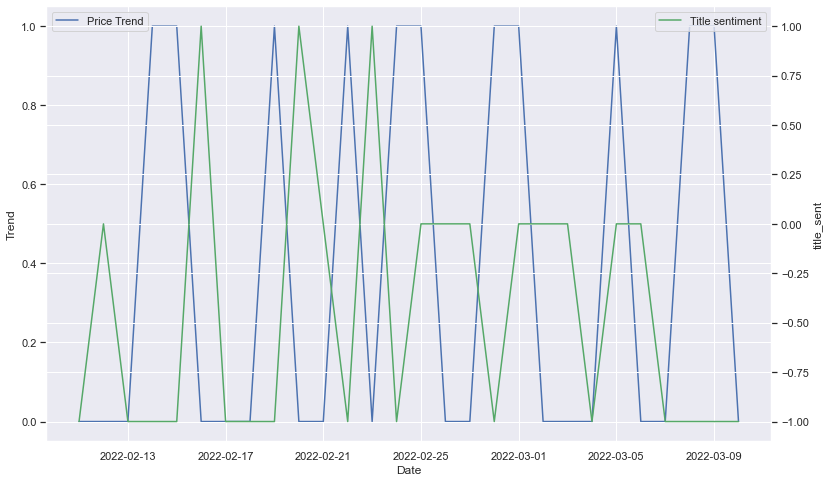

In [35]:
#Ploting the title_sent with Trend of closing prices
sns.set(rc={'figure.figsize':(13.0,8.0)})
ax=sns.lineplot(data=sentiment_closing_df['Trend'], color="b",label='Price Trend')
ax2 = plt.twinx()
sns.lineplot(data=sentiment_closing_df["title_sent"], color="g", ax=ax2, label='Title sentiment')

In [36]:
#Grouping all the title compound of the same date into the avg value of that date 
title_compound_avg = news_df_edit.groupby('date', as_index=False, sort=False)['title_compound'].mean()

#Renaming the column to Date which is same as crypto column and indexing the DF by date 
title_compound_avg = title_compound_avg.rename(columns={'date': 'Date'})
title_compound_avg.set_index('Date', inplace=True)

#Concat the crypto price with sentiment data
title_closing_df = pd.concat([title_compound_avg,bit_df], axis=1)
title_closing_df.head()

,title_compound,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-02-10,-0.260550,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2022-02-11,-0.130383,43571.128906,43810.832031,42114.539062,42407.937500,42407.937500,26954925781
2022-02-12,0.247667,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2022-02-13,-0.025675,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,0.258643,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012


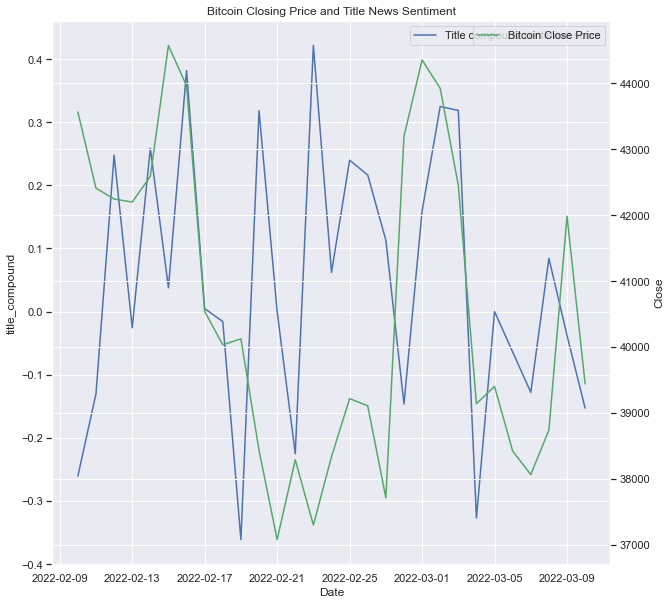

In [37]:
#Plotting the Title Compound Avg with closing prices
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.lineplot(data=title_closing_df['title_compound'], color="b",label='Title compound sentiment score')
ax2 = plt.twinx()
sns.lineplot(data=title_closing_df["Close"], color="g", ax=ax2, label='Bitcoin Close Price').set_title('Bitcoin Closing Price and Title News Sentiment')
plt.savefig('../Group4/Images/bitcoin_closing.png')

In [38]:
# Use the drop function to drop extra columns
bit_close = title_closing_df.drop(columns=["title_compound", "Open", "High", "Low", "Adj Close", "Volume"])

# Display sample data
bit_close.head()

,Close
Date,
2022-02-10,43565.113281
2022-02-11,42407.937500
2022-02-12,42244.468750
2022-02-13,42197.515625
2022-02-14,42586.917969


In [39]:
# Use the `pct_change` function to calculate daily returns of Bitcoin
bit_returns = bit_close.pct_change().dropna()

# Display sample data
bit_returns.head()

,Close
Date,
2022-02-11,-0.026562
2022-02-12,-0.003855
2022-02-13,-0.001111
2022-02-14,0.009228
2022-02-15,0.046688


In [40]:
# Use the drop function to drop extra columns
sentiment_close = title_closing_df.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [41]:
# Merge Title compound from sentiment with Doge daily returns
topic_sentiments = bit_returns.join(sentiment_close).dropna(how="any")

# Display data
display(topic_sentiments)

,Close,title_compound
Date,,
2022-02-11,-0.026562,-0.130383
2022-02-12,-0.003855,0.247667
2022-02-13,-0.001111,-0.025675
2022-02-14,0.009228,0.258643
2022-02-15,0.046688,0.037643
2022-02-16,-0.013760,0.381800
2022-02-17,-0.077882,0.004680
2022-02-18,-0.012508,-0.015880
2022-02-19,0.002278,-0.361200


In [42]:
# Correlate the Title Compound Avg to Daily returns
topic_sentiments.corr().style.background_gradient()

,Close,title_compound
Close,1.000000,-0.085909
title_compound,-0.085909,1.000000


In [43]:
# Use the drop function to drop extra columns
title_and_close = title_closing_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

# Display sample data
title_and_close.head()

,title_compound,Close
Date,,
2022-02-10,-0.260550,43565.113281
2022-02-11,-0.130383,42407.937500
2022-02-12,0.247667,42244.468750
2022-02-13,-0.025675,42197.515625
2022-02-14,0.258643,42586.917969


In [44]:
# Correlate the Title Compound Avg to Closing Price
title_and_close.corr().style.background_gradient()

,title_compound,Close
title_compound,1.000000,0.099111
Close,0.099111,1.000000


In [45]:
# Check Correlation between Title_sent and close
# Use the drop function to drop extra columns
title_and_close1 = sentiment_closing_df.drop(columns=["Open", "text_sent", "Title_Sentiment", "Price Diff", "Trend", "High", "Low", "Adj Close", "Volume"])

# Display sample data
title_and_close1.head()



,title_sent,Close
Date,,
2022-02-11,-1.0,42407.937500
2022-02-12,0.0,42244.468750
2022-02-13,-1.0,42197.515625
2022-02-14,-1.0,42586.917969
2022-02-15,-1.0,44575.203125


In [46]:
# Correlate the Title Sentiment to Closing Price
title_and_close1.corr().style.background_gradient()

,title_sent,Close
title_sent,1.000000,-0.098122
Close,-0.098122,1.000000
